# Main


11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


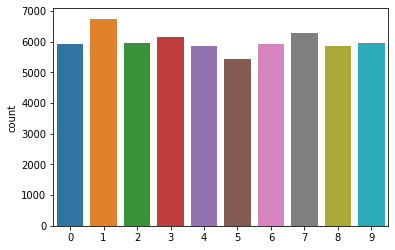

In [ ]:
import tensorflow as tf
import numpy as np
from keras import datasets, layers, models
import matplotlib.pyplot as plt
import seaborn as sns

(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# normalize the values
train_images, test_images = train_images/255.0, test_images/255.0
train_images, test_images = np.expand_dims(train_images, axis=-1), np.expand_dims(test_images, axis=-1)
print(train_images.shape)

sns.countplot(train_labels)

# Model Definition

In [ ]:
# model definition
model = models.Sequential()
model.add(layers.Conv2D(28, (5,5), activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

#model.summary()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

#model.summary()

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=["accuracy"]
)

history = model.fit(train_images, train_labels, epochs=10, shuffle=True, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 75s 39ms/step - loss: 0.1406 - accuracy: 0.9564 - val_loss: 0.0501 - val_accuracy: 0.9839
Epoch 2/10
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0453 - accuracy: 0.9861 - val_loss: 0.0325 - val_accuracy: 0.9897
Epoch 3/10
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0325 - accuracy: 0.9895 - val_loss: 0.0285 - val_accuracy: 0.9902
Epoch 4/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.0335 - val_accuracy: 0.9893
Epoch 5/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0205 - accuracy: 0.9933 - val_loss: 0.0392 - val_accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 65s 35ms/step - loss: 0.0170 - accuracy: 0.9949 - val_loss: 0.0282 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.0138 - accuracy: 0.9958 - val_loss: 0.0350 -

# Data Loss

313/313 - 3s - loss: 0.0284 - accuracy: 0.9916 - 3s/epoch - 8ms/step
0.991599977016449


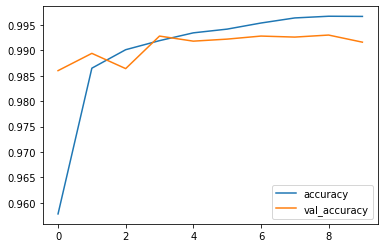

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel = 'Epochs'
plt.ylabel = 'Accuracy'
#plt.ylim([0.6, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

# MNIST

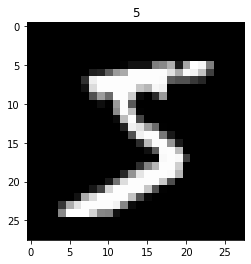

In [ ]:
import random

#train_images = train_images[:,:,:,0] # run to reshape values so the following runs
#print(train_images.shape)
plt.imshow(train_images[0], cmap='gray')
plt.title('%i' % train_labels[0])
plt.show()

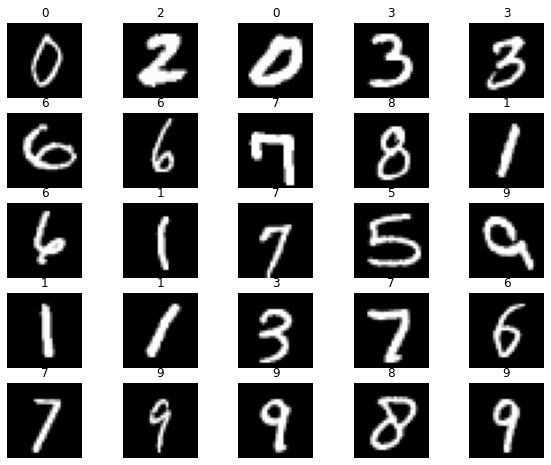

In [ ]:
figure = plt.figure(figsize=(10, 8))
cols, rows = 5, 5
for i in range(1, cols*rows+1):
  sample_indx = random.randint(0, len(train_images)-1)
  img, label = train_images[sample_indx], train_labels[sample_indx]
  figure.add_subplot(rows, cols, i)
  plt.title(label)
  plt.axis('off')
  plt.imshow(img.squeeze(), cmap='gray')
plt.show()